In [43]:
#The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline  
import numpy as np
import sklearn
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Now importing the data of don't overfit and settind 'id' as index variable. 

In [44]:
data= r'C:\Users\bhardwaj\Downloads\forest-cover-type-prediction\train.csv'

In [45]:
df=pd.read_csv(data)

In [46]:
df.set_index('id')

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,0.137,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,0.503,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,-0.012,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253
5,1.0,-0.641,-0.576,2.493,0.317,0.009,0.428,-1.887,2.412,0.374,...,-0.266,1.548,-0.523,0.923,0.021,-0.909,0.629,-2.386,0.265,0.549
6,1.0,-0.490,0.557,-0.881,0.831,0.247,2.316,1.268,1.679,-0.141,...,1.131,0.808,-1.398,0.053,0.667,-1.175,2.330,2.104,0.007,-1.066
7,1.0,1.252,-1.370,-0.196,2.246,-0.617,-0.479,-0.629,1.642,-0.401,...,-1.978,2.801,-1.643,-0.244,-0.864,-0.022,1.598,-0.693,-0.358,-0.084
8,1.0,1.410,-1.097,1.170,-0.091,-0.102,-0.835,-1.141,0.355,-0.513,...,-1.546,-0.190,1.387,1.021,-0.912,0.094,-0.930,1.931,1.190,0.964


In [47]:
df.target  

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     0.0
11     1.0
12     1.0
13     0.0
14     0.0
15     1.0
16     1.0
17     0.0
18     1.0
19     1.0
20     1.0
21     1.0
22     0.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
      ... 
220    1.0
221    1.0
222    1.0
223    1.0
224    1.0
225    0.0
226    1.0
227    0.0
228    0.0
229    1.0
230    1.0
231    1.0
232    1.0
233    0.0
234    0.0
235    1.0
236    1.0
237    1.0
238    1.0
239    0.0
240    0.0
241    1.0
242    1.0
243    0.0
244    0.0
245    0.0
246    0.0
247    0.0
248    1.0
249    0.0
Name: target, Length: 250, dtype: float64

Since target variable is categorical, this problem is classification problem.

In [48]:
df["target"] = df["target"].astype('category')

In [49]:
df.dtypes

id           int64
target    category
0          float64
1          float64
2          float64
3          float64
4          float64
5          float64
6          float64
7          float64
8          float64
9          float64
10         float64
11         float64
12         float64
13         float64
14         float64
15         float64
16         float64
17         float64
18         float64
19         float64
20         float64
21         float64
22         float64
23         float64
24         float64
25         float64
26         float64
27         float64
            ...   
270        float64
271        float64
272        float64
273        float64
274        float64
275        float64
276        float64
277        float64
278        float64
279        float64
280        float64
281        float64
282        float64
283        float64
284        float64
285        float64
286        float64
287        float64
288        float64
289        float64
290        float64
291        f

Checking the data for missing values. 

In [50]:
df.isnull().sum()

id        0
target    0
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
         ..
270       0
271       0
272       0
273       0
274       0
275       0
276       0
277       0
278       0
279       0
280       0
281       0
282       0
283       0
284       0
285       0
286       0
287       0
288       0
289       0
290       0
291       0
292       0
293       0
294       0
295       0
296       0
297       0
298       0
299       0
Length: 302, dtype: int64

No missing value in the data.

In [51]:
df.head(5)

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


Selecting all the columns with dtype as float.

In [52]:
x=df.select_dtypes(include="float64").values
target=df['target']

In [53]:
x

array([[-0.098,  2.165,  0.681, ..., -0.414,  1.038, -1.065],
       [ 1.081, -0.973, -0.383, ..., -1.099, -0.936,  0.973],
       [-0.523, -0.089, -0.348, ...,  0.004,  0.8  , -1.211],
       ...,
       [ 1.411, -1.465,  0.119, ...,  0.76 ,  0.168, -0.719],
       [ 0.62 ,  1.04 ,  0.184, ..., -0.805,  2.029, -0.423],
       [ 0.489,  0.403,  0.139, ..., -1.454, -0.625,  1.474]])

Standardizing the features by removing the mean and scaling to unit variance.

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [56]:
x=pd.DataFrame(data=scaler.fit_transform(x))

In [57]:
x.head(5)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.121736,2.176002,0.503692,-0.609972,1.265232,-0.469388,-0.266814,0.210682,-2.296917,1.758518,...,0.814697,1.257605,0.509875,-0.664341,0.699064,-1.921131,1.040182,-0.421724,1.022411,-0.965720
1,1.061577,-0.939278,-0.539790,0.320974,-0.415729,0.340017,1.134681,0.291718,0.042547,-0.320787,...,-0.207701,-1.876475,-1.339295,1.430147,-0.703385,-1.464704,-0.522377,-1.108796,-0.939658,1.136883
2,-0.548290,-0.061678,-0.505465,0.144689,-0.022827,0.431232,-0.054798,-0.267006,0.180835,0.144993,...,-0.031358,0.140793,-1.302542,0.769883,1.430611,-1.021786,-1.646923,-0.002459,0.785850,-1.116348
3,0.043868,0.005829,0.220265,-1.623118,-0.433148,-0.752470,-1.062122,0.805660,0.561388,0.234415,...,-0.444478,0.529204,-0.644150,-0.994994,0.915116,0.553031,-0.630069,-0.261240,-0.539094,0.378584
4,2.332208,-0.798306,0.336970,-0.022683,1.183942,1.678890,0.550393,1.525391,0.025911,2.125050,...,0.845409,0.007888,2.516556,-1.026286,-0.891009,1.432111,1.242103,1.476000,0.416098,0.394060


Splitting the data into train and test. Using train data to build the logistic regression model and cross validate.

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lm= LogisticRegression()

In [61]:
from sklearn.metrics import roc_curve

In [62]:
from sklearn.metrics import roc_auc_score

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [67]:
train_test_split?

In [101]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x.select_dtypes('float64'),df.target,test_size=0.3)

In [102]:
from sklearn.model_selection import learning_curve, GridSearchCV

In [103]:
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}

In [104]:
clfl2=LogisticRegression()

In [105]:
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")

In [106]:
fitmodel.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [107]:
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.cv_results_

(LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 {'C': 1},
 0.6971428571428572,
 {'mean_fit_time': array([0.01150579, 0.01127729, 0.01583996, 0.01551313, 0.01806235,
         0.01687779]),
  'std_fit_time': array([0.00355325, 0.00581287, 0.00039122, 0.00826842, 0.00501377,
         0.00414828]),
  'mean_score_time': array([0.00259204, 0.00471931, 0.        , 0.00344782, 0.00094867,
         0.00123158]),
  'std_score_time': array([0.00195942, 0.00574534, 0.        , 0.0017467 , 0.00118604,
         0.00166293]),
  'param_C': masked_array(data=[0.0001, 0.001, 0.1, 1, 10, 100],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'C'

In [108]:
clfl2=LogisticRegression(C=fitmodel.best_params_['C'])
clfl2.fit(Xtrain, ytrain)
ypred2=clfl2.predict(Xtest)
accuracy_score(ypred2, ytest)

0.72

In [109]:
df.target.value_counts()

1.0    160
0.0     90
Name: target, dtype: int64

Below is the confusion matrix for the regression.

In [110]:
confusion_matrix(ypred2, ytest)

array([[18,  9],
       [12, 36]], dtype=int64)

Because the data is imbalanced, the better way to see the accuracy of result is through roc_auc_score and roc_curve.

In [111]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [112]:
auc = roc_auc_score(ypred2, ytest)

In [113]:
print('AUC: %.2f' % auc)

AUC: 0.71


In [114]:
fpr, tpr, thresholds = roc_curve(ypred2, ytest)

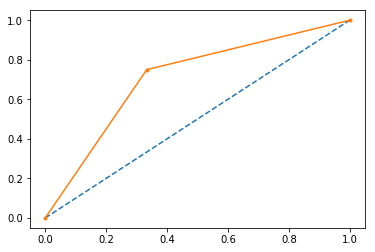

In [115]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

The roc_auc_score shows that this model predicts approximately 71% of the data correctly.